# Introduction

Melbourne Housing Project

Using Melbourne_housing.csv data create a model (Linear Regression) to predict a
house's value. We want to be able to understand what creates value
in a house, as though we were a real estate developer. The project
should follow the guideline as:
1. Examine and explore data (visualization, interactions among
features)
2. Apply the model for prediction with holdout and cross
validation
3. Using PCA, apply the model with holdout and cross
validation
4. Visualize the residue and homoscedasticity
5. Tune the model if necessary
6. Write up analysis for each section (for example, explain why
the model is overfitting, explain why applying PCA is better,
etc.)
7. Include conclusions for summary

# A quick look of the datasets

In [355]:
import pandas as pd
import numpy as np # linear algebra
import scipy
from sklearn import metrics
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
data = pd.read_csv("./Melbourne_housing_FULL.csv")
data.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [356]:
# Describe the Datasets

In [357]:
print (f"Data has {data.shape[0]} rows and {data.shape[1]} columns")
data.describe()

Data has 34857 rows and 21 columns


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [358]:
missing_rows = data.isna().sum()
missing_rows

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

# Missing value

In [359]:
missing_rows = data.isna().sum()
print(f'There are {missing_rows[4]} rows do not have price. We will delete those rows')


There are 7610 rows do not have price. We will delete those rows


In [360]:
data = data.dropna()
data.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [361]:
# Dữ liệu dạng object 
data.describe(include='O')

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,8887,8887,8887,8887,8887,8887,8887,8887
unique,315,8764,3,5,250,77,33,8
top,Reservoir,1/1 Clarendon St,h,S,Nelson,24/02/2018,Boroondara City Council,Southern Metropolitan
freq,194,3,6625,5602,986,227,810,2707


In [362]:
data.shape 

(8887, 21)

We lost many data when do dropna. 8k rows is also enough. In this assignment, I do not focus on process missing data.

# Data exploration

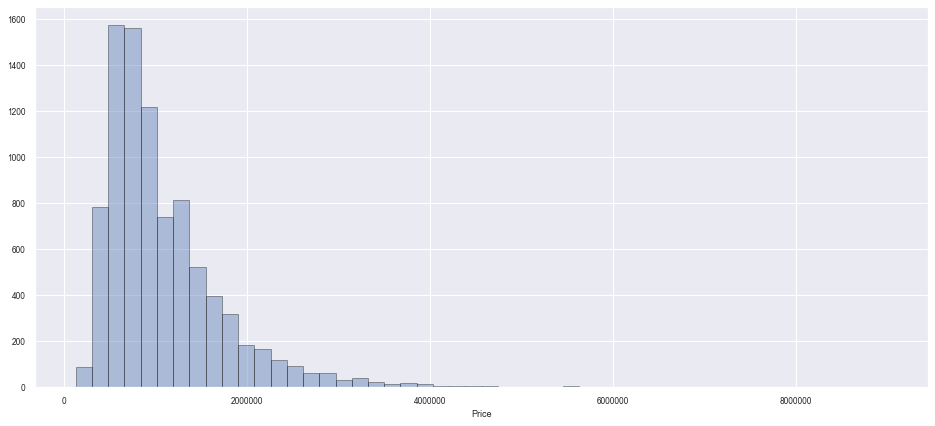

In [363]:
plt.figure(figsize=(16,7))
sns.distplot(data['Price'], kde = False,hist_kws=dict(edgecolor="k"))

The majority of homes around $900k

In [364]:
## Price vs others

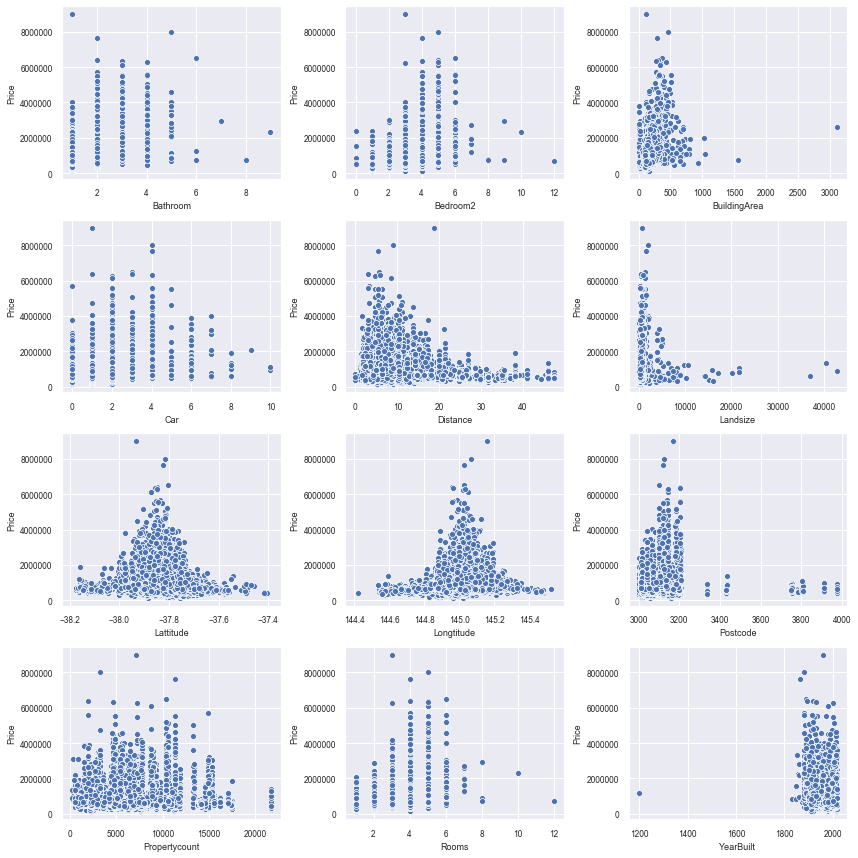

In [365]:
numerical = data.select_dtypes(include = [np.number])

%config InlineBackend.figure_format = 'png'
#Plot numerical data against Sale Price
fig, axes = plt.subplots(4, 3, figsize=(12, 12))

for idx, feat in enumerate(numerical.columns.difference(['Price'])):
    ax = axes[int(idx / 3), idx%3]
    sns.scatterplot(x=feat, y='Price', data=numerical, ax=ax);
    ax.set_xlabel(feat)
    ax.set_ylabel('Price')
    
fig.tight_layout();

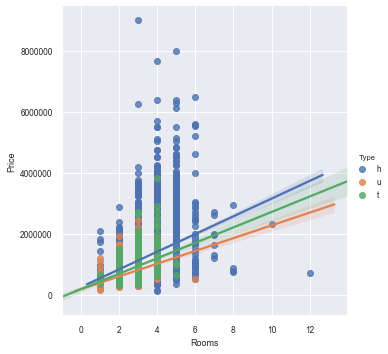

In [366]:
data_temp = data[data['Rooms'] < 15]
sns.lmplot(x='Rooms', 
           y='Price',
          hue = 'Type',
          data = data_temp)

Cùng số phòng thì 
Type h đắt nhất
Type t đắt nhì
Type u rẻ nhất 

# Correlation 

Text(0.5, 1, 'Variable Correlation')

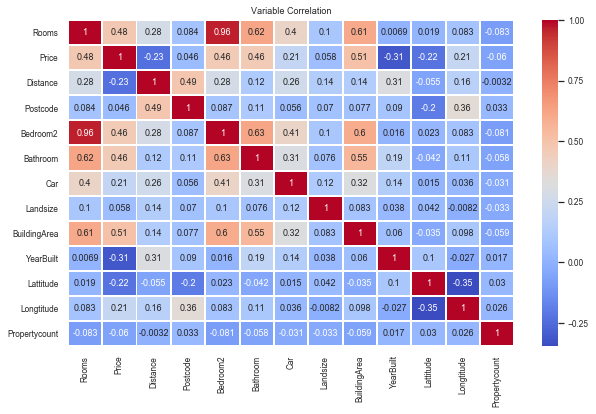

In [367]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

'Rooms', 'Distance', 'Bathroom', 'Car', 'BuildingArea','YearBuilt', 'Lattitude', 'Longtitude' are correlated to Price attibute.
The corelation of Rooms and BedRoom2 is 0.96. I will drop column Bedroom2.

In [368]:
# drop Bedroom2
data = data.drop(columns=['Bedroom2'])
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0


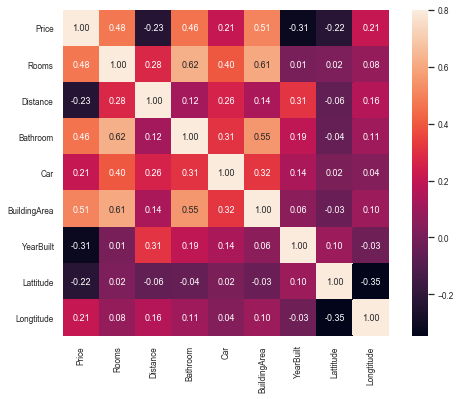

In [369]:
crcols = ['Price', 'Rooms', 'Distance', 'Bathroom', 'Car', 'BuildingArea','YearBuilt', 'Lattitude', 'Longtitude']
corrmat = data[crcols].corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.set(font_scale=0.75)
sns.heatmap(corrmat,annot=True, square=True, fmt='.2f', vmax=.8);


# Linear regression 

In [370]:
# Holdout 

In [371]:
# Identify numeric features
data.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

In [372]:
# Split
# Create features variable 
X =data[['Rooms', 'Distance', 'Bathroom', 'Car', 'BuildingArea','YearBuilt', 'Lattitude', 'Longtitude']]

# Create target variable
y = data['Price']

# Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)


In [373]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression

# Create linear regression object
regressor = LinearRegression()

# Fit model to training data
model_holdout = regressor.fit(X_train,y_train)

In [374]:
# Predict
# Predicting test set results
y_pred = regressor.predict(X_test)
 

## Regression Evaluation Metrics

Regression Evaluation Metrics
Three common evaluation metrics for regresson problems:

Mean Absolute Error (MAE)
Mean Squared Error (MSE)
Root Mean Squared Error (RMSE)
All basic variations on the difference between what you predicted and the true values.
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE more popular than MAE, because MSE "punishes" larger errors, tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units (target units) .

All of these are loss functions, because we want to minimize them.

In [375]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MAE: 280148.46538324846
MSE: 232939955214.1034
RMSE: 482638.5347380619


RMSE tells us explicitly how much our predictions deviate, on average, from the actual values in the dataset. In this case, our predicted values are $482,638 away from the actual value.



In [376]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.5277449061257897


According to the R-squared, 52.7% of the variance in the dependent variable is explained by the model.

## Analyze the Residuals

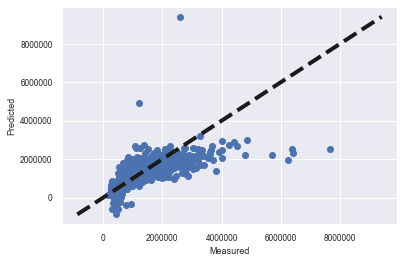

In [377]:
# Actual v predictions scatter
fig, ax = plt.subplots()

ax.scatter(y_test, y_pred)
ax.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [378]:
y_predict_holdout = (model_holdout.predict(X_test))
y_actual = (y_test)
out = pd.DataFrame({'Actual_Price': y_actual, 'predict_Price': y_predict_holdout,'Diff' :(y_actual-y_predict_holdout)})
out[['Actual_Price','predict_Price','Diff']].head(10)



,Actual_Price,predict_Price,Diff
1642,1200000.0,1.022976e+06,177024.487239
8140,540000.0,5.303803e+05,9619.730566
33985,1002500.0,1.045299e+06,-42799.272085
23081,460000.0,4.577384e+05,2261.635492
27366,675000.0,6.752376e+05,-237.587157
8788,681000.0,4.928110e+05,188188.990533
19830,800000.0,1.076586e+06,-276585.761791
11087,825000.0,1.227027e+06,-402027.205477
4702,1665000.0,1.271256e+06,393744.374349
11025,773000.0,9.147130e+05,-141712.995804


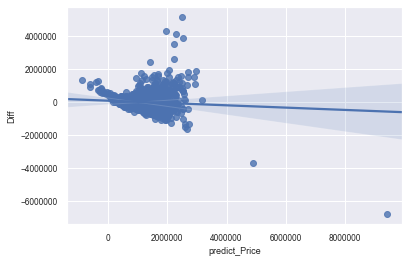

In [379]:
sns.regplot(out['predict_Price'],out['Diff'])

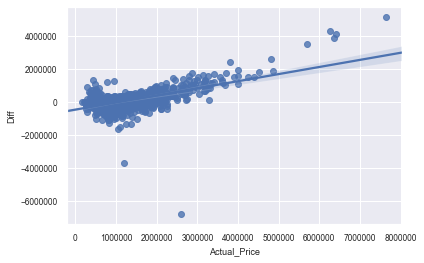

In [380]:
sns.regplot(out['Actual_Price'],out['Diff'])


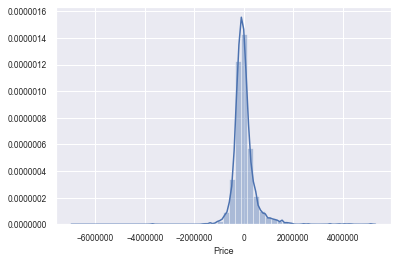

In [381]:
# Histogram of the distribution of residuals
sns.distplot((y_test - y_pred))

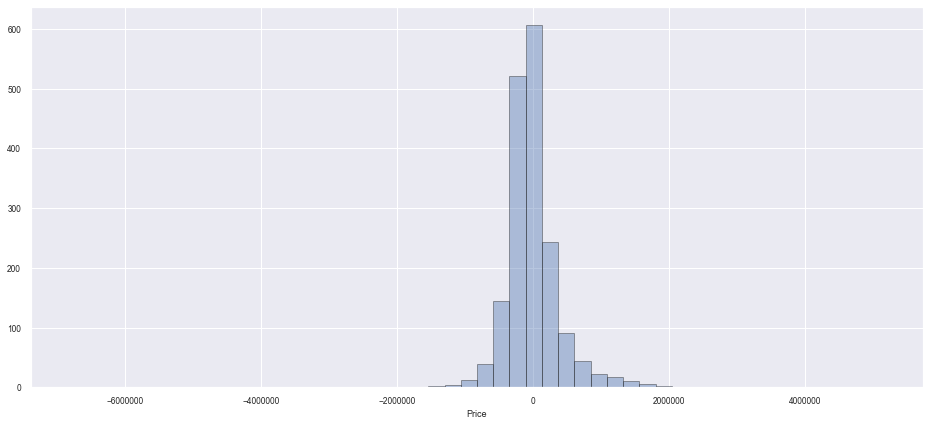

In [382]:
plt.figure(figsize=(16,7))
sns.distplot(y_test - y_pred, kde = False,hist_kws=dict(edgecolor="k"))

# Cross validation no PCA

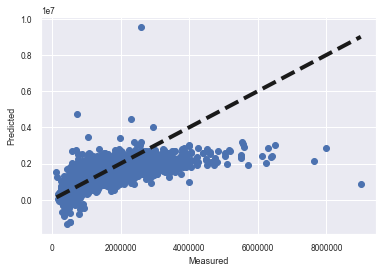

In [383]:
from sklearn.model_selection import cross_val_predict

y_cross_val = data.Price
X_cross_val = data[['Rooms','Distance','Car','Bathroom','Lattitude','Longtitude','Postcode','Landsize','BuildingArea']]
predicted = cross_val_predict(regressor, X_cross_val.values, y_cross_val.values, cv=5)

fig, ax = plt.subplots()
ax.scatter(y_cross_val, predicted)
ax.plot([y_cross_val.min(), y_cross_val.max()], [y_cross_val.min(), y_cross_val.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Regression Evaluation Metrics

In [384]:
print('MAE:',metrics.mean_absolute_error(y_cross_val,predicted))
print('MSE:',metrics.mean_squared_error(y_cross_val,predicted))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_cross_val,predicted)))

MAE: 309668.65585222986
MSE: 217677428851.26083
RMSE: 466559.13757128455


RMSE tells us explicitly how much our predictions deviate, on average, from the actual values in the dataset. In this case, our predicted values are $466,559 away from the actual value.

In [385]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y_cross_val,predicted))

R^2 = 0.5283739350491188


According to the R-squared, 52.7% of the variance in the dependent variable is explained by the model.

## Analyze the Residuals

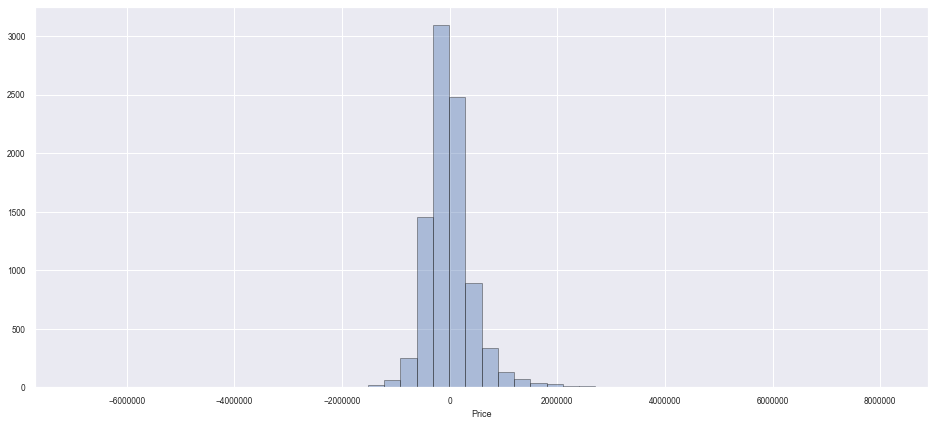

In [386]:
# Histogram of the distribution of residuals
plt.figure(figsize=(16,7))
sns.distplot(y_cross_val - predicted, kde = False,hist_kws=dict(edgecolor="k"))

# 3. Using PCA, apply the model with holdout and cross validation

## Apply PCA for dataset

In [387]:
# Split
# Create features variable 
X =data[['Rooms', 'Distance', 'Bathroom', 'Car', 'BuildingArea','YearBuilt', 'Lattitude', 'Longtitude']]

# Create target variable
y = data['Price']

#Standardize the data before feeding it to PCA algorithm
scaler = MinMaxScaler()
scaler.fit(X )

X = scaler.transform(X)

#Use PCA algorithm to reduce the number of features to speed up training 
pca = PCA(n_components=7)
pca.fit(X)

# Use PCA to transform data 
X  = pca.transform(X)

In [388]:
## Find n_components sum(explained_variance_ratio_) > 0.8 

In [389]:
pca.explained_variance_ratio_

array([0.33746286, 0.22593967, 0.1742683 , 0.10866438, 0.08620648,
       0.04244062, 0.0190129 ])

In [390]:
pca_explain  = pca.explained_variance_ratio_
#pca_explain.sort(reverse = True)
print(sorted(pca_explain, reverse= True ))
print('0.33+0.22+0.17+0.1 = 0.82 > 0.8, hence I will choose n_components=4')

[0.3374628636469532, 0.2259396739765132, 0.17426830151502773, 0.10866438337794013, 0.08620647850717572, 0.04244062303229611, 0.019012904015337215]
0.33+0.22+0.17+0.1 = 0.82 > 0.8, hence I will choose n_components=4


In [391]:
# Use PCA algorithm again with n_components=4
pca = PCA(n_components=4)
pca.fit(X)

# Use PCA to transform data 
X  = pca.transform(X)

In [392]:
#Split the data into training and validation data sets
train_X_holdout_pca, test_x_holdout_pca, train_y_holdout_pca, test_y_holdout_pca = train_test_split(X, y, test_size=0.3)

model_holdout_pca = LinearRegression()
model_holdout_pca.fit(train_X_holdout_pca,train_y_holdout_pca)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [393]:
# Predict
# Predicting test set results
y_pred = model_holdout_pca.predict(test_x_holdout_pca)

## Regression Evaluation Metrics

In [394]:
print('MAE:',metrics.mean_absolute_error(test_y_holdout_pca,y_pred))
print('MSE:',metrics.mean_squared_error(test_y_holdout_pca,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(test_y_holdout_pca,y_pred)))

MAE: 334615.6908061194
MSE: 246873795461.16507
RMSE: 496863.9607187918


RMSE tells us explicitly how much our predictions deviate, on average, from the actual values in the dataset. In this case, our predicted values are $496,863 away from the actual value.

In [400]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(test_y_holdout_pca,y_pred))

R^2 = 0.46274426070395724


According to the R-squared, 46.2% of the variance in the dependent variable is explained by the model

In [ ]:
## Analyze the residues

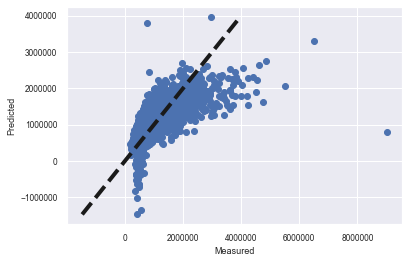

In [395]:
# Actual v predictions scatter
fig, ax = plt.subplots()

ax.scatter(test_y_holdout_pca, y_pred)
ax.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [396]:
y_predict_holdout_pca = (model_holdout_pca.predict(test_x_holdout_pca))
y_actual = (test_y_holdout_pca)
out = pd.DataFrame({'Actual_Price': y_actual, 'predict_Price': y_predict_holdout_pca,'Diff' :(y_actual-y_predict_holdout_pca)})
out[['Actual_Price','predict_Price','Diff']].head(10)


,Actual_Price,predict_Price,Diff
15494,1925000.0,1.424953e+06,5.000475e+05
8557,613000.0,7.835865e+05,-1.705865e+05
12155,1435000.0,9.260510e+05,5.089490e+05
4142,450000.0,5.248168e+05,-7.481677e+04
21737,320000.0,7.013701e+05,-3.813701e+05
8580,921500.0,9.846325e+05,-6.313253e+04
6962,1417250.0,1.326746e+06,9.050408e+04
4107,360000.0,6.236288e+05,-2.636288e+05
18856,1500000.0,1.756776e+06,-2.567762e+05
847,2100000.0,7.961963e+05,1.303804e+06


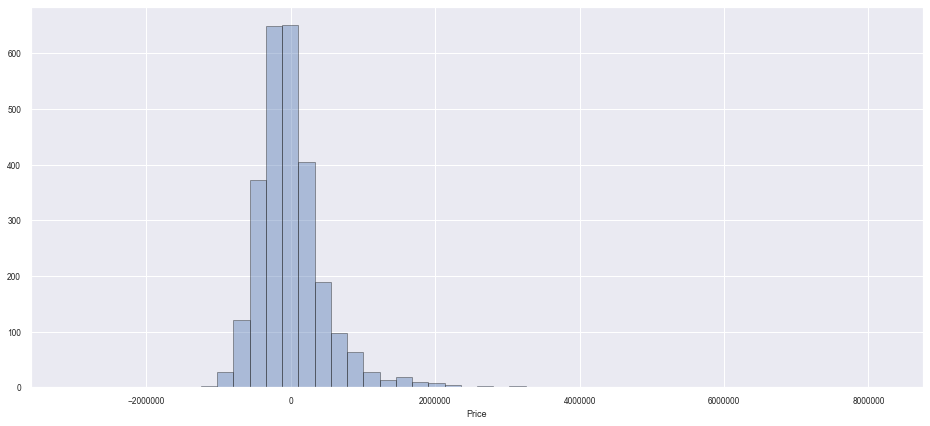

In [397]:

plt.figure(figsize=(16,7))
sns.distplot(y_actual - y_predict_holdout_pca, kde = False,hist_kws=dict(edgecolor="k"))

# Cross validate with pca

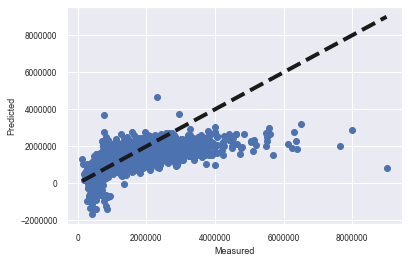

In [398]:
model_cross_pca = LinearRegression()
y_cross_val = data.Price
predicted = cross_val_predict(model_cross_pca, X, y_cross_val.values, cv=5)

fig, ax = plt.subplots()
ax.scatter(y_cross_val, predicted)
ax.plot([y_cross_val.min(), y_cross_val.max()], [y_cross_val.min(), y_cross_val.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Regression Evaluation Metrics

In [402]:
print('MAE:',metrics.mean_absolute_error(y_cross_val,predicted))
print('MSE:',metrics.mean_squared_error(y_cross_val,predicted))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_cross_val,predicted)))

MAE: 340507.7331746991
MSE: 246681713005.08636
RMSE: 496670.628289097


 In this case, our predicted values are $496,670 away from the actual value.

In [404]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y_cross_val,predicted))

R^2 = 0.4654882096041265


In [ ]:
According to the R-squared, 46.5% of the variance in the dependent variable is explained by the model

ValueError: operands could not be broadcast together with shapes (2667,) (8887,) 

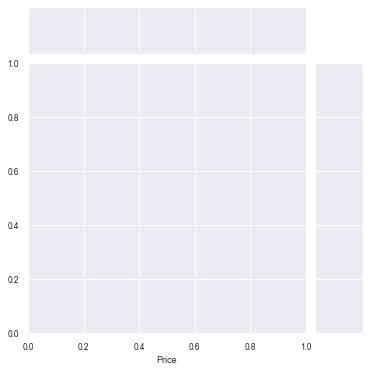

In [399]:
#Plot the actual Price value against predicted Sale Price 
g = sns.jointplot(x= val_y, y= predicted, kind='reg', xlim=(0,8500000), ylim=(0,8500000),
                  joint_kws={'line_kws':{'color':'darkorange'}})
g.set_axis_labels(xlabel='Actual Price', ylabel='Predicted Price')

4. Conclusion